In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luisfetoga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
class limpieza:

    def solo_letras(self, texto):
        abc = set(list("abcdefghijklmnñopqrstuvwxyz"))
        new_texto = ""
        for i in range(len(texto)):
            if texto[i] not in abc:
                new_texto += " "
            else:
                new_texto += texto[i]
        return new_texto

    def texto(self):
        self.data = self.data.lower()
        self.data = self.data.replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u")
        self.data = self.solo_letras(self.data)
        return self.data
    
    def stopwords(self):
        stop = stopwords.words("spanish")
        self.data = " ".join([item for item in self.data.split() if item not in stop])
        return self.data

    def stem(self):
        stemmer = nltk.SnowballStemmer("spanish")
        self.data = " ".join([stemmer.stem(item) for item in self.data.split()])
        return self.data
    
    def limpiar(self, data):
        self.data = data
        self.texto()
        self.stem()
        self.stopwords()
        return self.data


In [37]:
data = pd.read_csv('tipo2_entrenamiento_estudiantes.csv')

data["Review"] = data["Review"].apply(limpieza().limpiar)

data_train, data_test = train_test_split(data, test_size=0.2)
x_train, x_test = data_train["Review"], data_test["Review"]
y_train, y_test = data_train["Class"], data_test["Class"]

In [38]:
pipeline = make_pipeline(
    TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, ngram_range=(1, 3)),
    LogisticRegression(max_iter=1000)
)

Exactitud:  0.51
Precisión:  0.51
Recall:  0.51
F1:  0.503


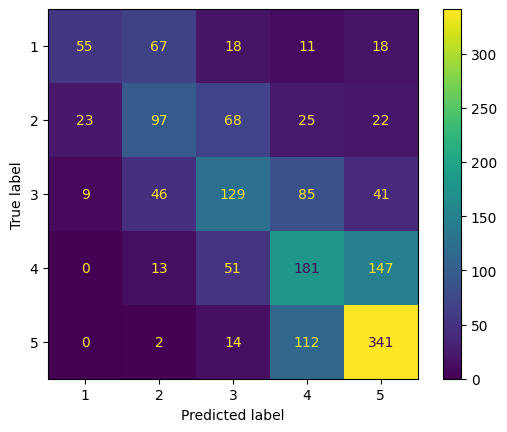

In [39]:
pipeline.fit(x_train, y_train)

pred = pipeline.predict(x_test)

print("Exactitud: ", round(accuracy_score(y_test, pred), 3))
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 3))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'), 3))
print("F1: ", round(f1_score(y_test, pred, average='weighted'), 3))

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()

plt.show()

In [43]:
test = pd.Series(["horrible", "muy bueno", "malo", "excelente", "pésimo", "muy malo"])

test = test.apply(limpieza().limpiar)

result = pipeline.predict(test)
score = pipeline.predict_proba(test)

for i in range(len(test)):
    print(test[i], ":", result[i], "("+str(round(score[i][result[i]-1]*100,2))+"%)")


horribl : 1 (60.32%)
buen : 4 (87.98%)
mal : 2 (59.07%)
excelent : 5 (97.59%)
pesim : 1 (89.19%)
mal : 2 (59.07%)


In [44]:
pipeline.predict_proba(test)

array([[6.03171662e-01, 1.52577867e-01, 8.32184737e-02, 7.12752883e-02,
        8.97567087e-02],
       [4.55917970e-04, 3.04753908e-03, 8.87893769e-02, 8.79757971e-01,
        2.79491953e-02],
       [3.53544341e-01, 5.90720042e-01, 5.09316029e-02, 3.74641303e-03,
        1.05760070e-03],
       [2.44563209e-04, 3.72682504e-04, 8.73247677e-04, 2.25992383e-02,
        9.75910268e-01],
       [8.91867810e-01, 7.44273161e-02, 1.24446822e-02, 9.90241579e-03,
        1.13577759e-02],
       [3.53544341e-01, 5.90720042e-01, 5.09316029e-02, 3.74641303e-03,
        1.05760070e-03]])

In [45]:
from joblib import dump, load

dump(pipeline, 'reviewModel.joblib')

['reviewModel.joblib']